In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os,sys
parent_dir = os.path.abspath('../')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from util.dark_enhance import DarkEnhance
from util.frame_diff import Sandevistan

In [2]:
from torchvision.io import read_video
frames, _, info  = read_video('/home/neoncloud/low_light_video/validate/286.mp4')
print('frames',frames.shape)

frames torch.Size([67, 240, 320, 3])


/home/neoncloud/miniconda3/envs/pytorch/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/neoncloud/miniconda3/envs/pytorch/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


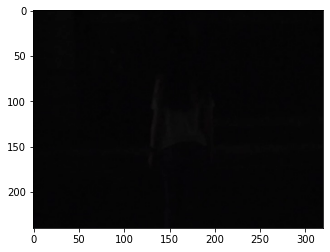

In [3]:
#enhancer = DarkEnhance()
frame_diff = Sandevistan(n_trunks=6,thres=0)
frames = frames.transpose(3,1).unsqueeze(0)
plt.imshow((frames[0,0,...]).transpose(0,2).numpy())
x,y = frame_diff(frames.clone().float())

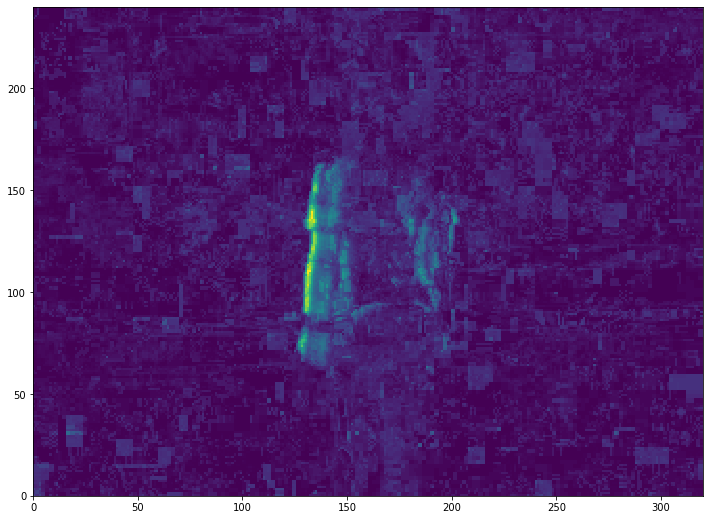

In [11]:
plt.figure(figsize=(12,9))
plt.pcolor(x.squeeze()[0].transpose(0,1).flip(0).numpy())